# Model Selection

## Import the necessary libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Load the dataset into python environment

In [40]:
data = pd.read_csv('/content/titanic_dataset .csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.shape

(891, 12)

From this dataset, there are 891 rows and 12 columns

Print the datatypes of each columns of the dataset

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 * PassengerId, Survived, PClass, SibSp, Parch belongs to integer datatype
 * Name, Sex, Ticket, Cabin, Embarked beongs to object datatype
 * Age, Fare belongs to float datatype

## Do the necessary pre-processing steps

### Check the missing values

In [43]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The missing values contain Age, Cabin and Embarked. Based on the category, Cabin and Embarked should be fill in mode and Age should be filled median

### Filling the Nan Values

In [44]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

### Again check the Nan values

In [45]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

The Nan values are filled

## Correlation

<ipython-input-47-0f11b0d1cf59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_num = data.corr()


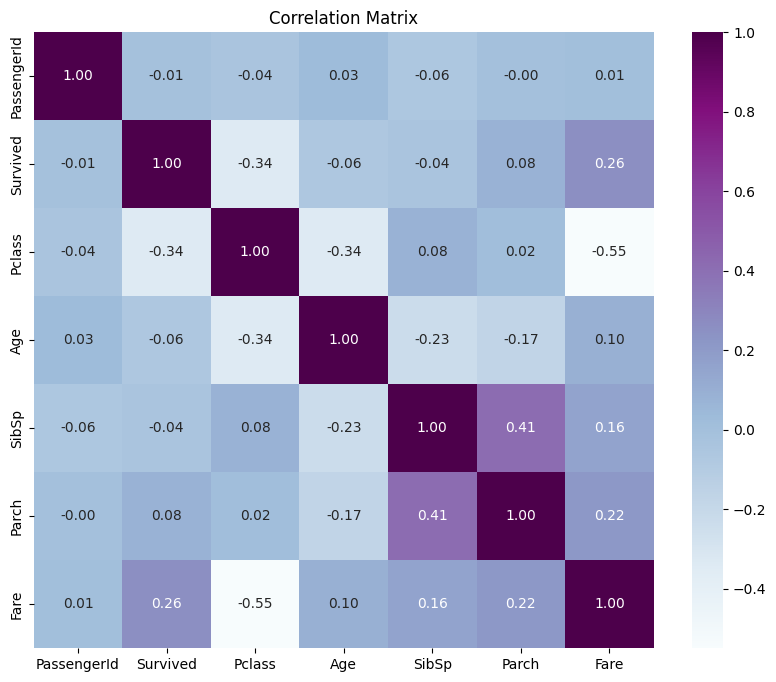

In [47]:
correlation_matrix_num = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_num, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Gender Distribution

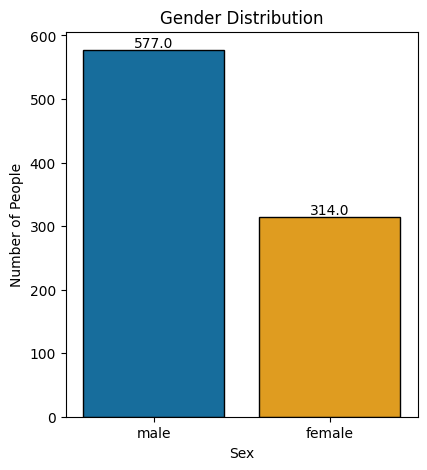

In [48]:
# Calculate the total number of men and women
total_male = (data['Sex'] == 'male').sum()
total_female = (data['Sex'] == 'female').sum()

# Let's create a histogram of the total number of men and women
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=data, hue='Sex', palette={"male": sns.color_palette("colorblind")[0], "female": "orange"}, edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of People')

for patch in plt.gca().patches:
    height = patch.get_height()
    plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                       ha='center', va='bottom')

plt.show()

## Gender Distribution of Non Survivors vs Survivors

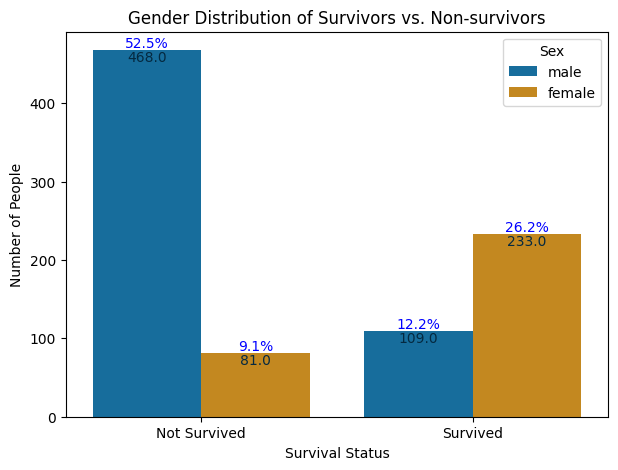

In [50]:
plt.figure(figsize=(7, 5), dpi=100)

# Bar plot
sns.countplot(data=data, x='Survived', hue='Sex', palette='colorblind')
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.title('Gender Distribution of Survivors vs. Non-survivors')

total_counts = data['Survived'].value_counts()
total_people = len(data)

for patch in plt.gca().patches:
    height = patch.get_height()
    if height != 0:
        total = total_counts[int(patch.get_x())]
        percentage = (height / total_people) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                           ha='center', va='bottom', color='blue')
        plt.gca().annotate(f'{height}', (patch.get_x() + patch.get_width() / 2., height),
                           ha='center', va='top', color='#042940')

plt.show()

### Handling the Outliers

Text(0.5, 1.0, 'Numerical Data Featured on Boxplot')

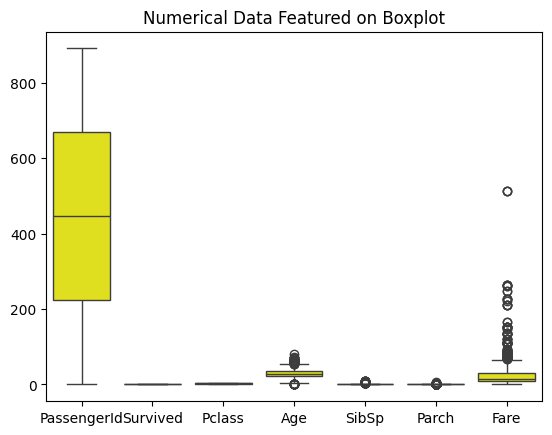

In [51]:
sns.boxplot(data,color='yellow')
plt.title('Numerical Data Featured on Boxplot')

Based on the graph, Age, SibSP, Parch and Fare has some extreme outliers which can bring the cause of error variance. To remove the outliers, we need to calculate the quartile values and use the clip method

In [52]:
def iqr_clipping(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=low_lim, upper=up_lim)
    return data
columns = ['Age','SibSp','Parch','Fare']
data = iqr_clipping(data, columns)

Text(0.5, 1.0, 'Numerical Data Featured on Boxplot')

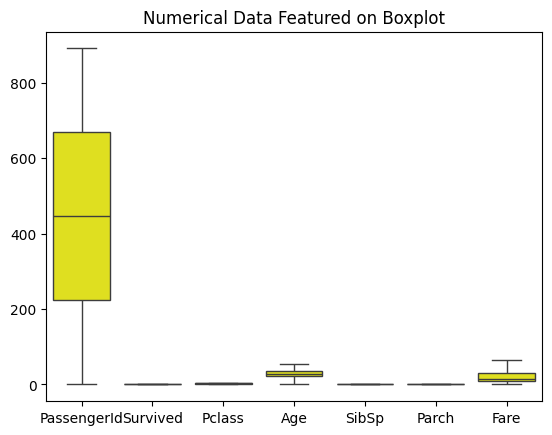

In [53]:
sns.boxplot(data,color='yellow')
plt.title('Numerical Data Featured on Boxplot')

In [54]:
#Drop the unecessary columns in the dataset
cols_drop = ['PassengerId','Name','Ticket','Cabin']
data.drop(cols_drop,axis=1,inplace=True)

In [55]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [58]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [59]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [62]:
#Using One-Hot Encoding
print("Before")
print(data.shape)
data = pd.get_dummies(data).astype(int)
print("After")
print(data.shape)

Before
(891, 8)
After
(891, 11)


In [63]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,65,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


## copy the training data for each model so that I can compare all accuracies in a single data frame.

In [64]:
KNN = data.copy()
SVM = data.copy()

## Model Building

## SVM Model

In [65]:
X = SVM.drop("Survived", axis=1)
y = SVM["Survived"]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
from sklearn.svm import SVC
classifier_svm = SVC(C=10,gamma='auto', kernel='rbf')

classifier_svm.fit(X_train, y_train)

SVC(C=10, gamma='auto')

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kfold_validator=KFold(10)
stratified_cv=StratifiedKFold(n_splits=10)

In [84]:
cv_scores_svm_1 = cross_val_score(classifier_svm, X, y, cv=kfold_validator)
cv_scores_svm_2 = cross_val_score(classifier_svm, X, y, cv=stratified_cv)

print("Cross-validation scores of KFold:", cv_scores_svm_1)
print("Mean CV accuracy of KFold:", cv_scores_svm_1.mean())
print()
print("Cross-validation scores of Stratified KFold:", cv_scores_svm_2)
print("Mean CV accuracy of Stratified KFold:", cv_scores_svm_2.mean())

Cross-validation scores of KFold: [0.71111111 0.76404494 0.76404494 0.78651685 0.79775281 0.7752809
 0.71910112 0.71910112 0.79775281 0.7752809 ]
Mean CV accuracy of KFold: 0.7609987515605494

Cross-validation scores of Stratified KFold: [0.71111111 0.75280899 0.74157303 0.82022472 0.82022472 0.74157303
 0.75280899 0.74157303 0.75280899 0.76404494]
Mean CV accuracy of Stratified KFold: 0.7598751560549313


On checking the mean scores of KFold and Stratified KFold, KFold of SVM has the highest average accuracy with 76%

In [75]:
y_pred_svm = classifier_svm.predict(X_test)

In [76]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1)

Accuracy: 0.7877094972067039
Precision: 0.7924528301886793
Recall: 0.6086956521739131
F1 Score: 0.6885245901639344


The accuracy model of SVM in kernal 'rbf' is 78%

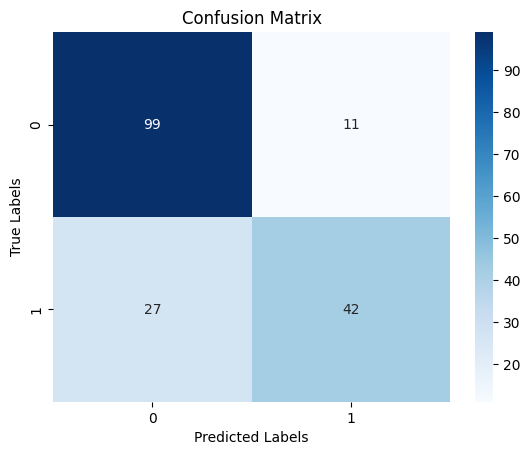

In [79]:
cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

## KNN Model

In [80]:
X = KNN.drop("Survived", axis=1)
y = KNN["Survived"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [82]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(algorithm='auto',n_neighbors = 5, metric = 'euclidean', weights='uniform')

classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [85]:
cv_scores_knn_1 = cross_val_score(classifier_knn, X, y, cv=kfold_validator)
cv_scores_knn_2 = cross_val_score(classifier_knn, X, y, cv=stratified_cv)

print("Cross-validation scores of KFold:", cv_scores_knn_1)
print("Mean CV accuracy of KFold:", cv_scores_knn_1.mean())
print()
print("Cross-validation scores of Stratified KFold:", cv_scores_knn_2)
print("Mean CV accuracy of Stratified KFold:", cv_scores_knn_2.mean())

Cross-validation scores of KFold: [0.67777778 0.6741573  0.71910112 0.71910112 0.70786517 0.74157303
 0.71910112 0.73033708 0.7752809  0.79775281]
Mean CV accuracy of KFold: 0.7262047440699126

Cross-validation scores of Stratified KFold: [0.68888889 0.66292135 0.73033708 0.79775281 0.76404494 0.73033708
 0.78651685 0.74157303 0.73033708 0.79775281]
Mean CV accuracy of Stratified KFold: 0.7430461922596754


Here, on checking the mean scores of KFold and Startified KFold, Stratified KFold has the highest average accuracy with 74%

In [86]:
y_pred_KNN = classifier_knn.predict(X_test)

In [87]:
accuracy_knn = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy_knn)

precision = precision_score(y_test, y_pred_KNN)
recall = recall_score(y_test, y_pred_KNN)

print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_KNN)
print("F1 Score:", f1)

Accuracy: 0.7821229050279329
Precision: 0.75
Recall: 0.6521739130434783
F1 Score: 0.6976744186046512


The accuracy model of KNN is 78%

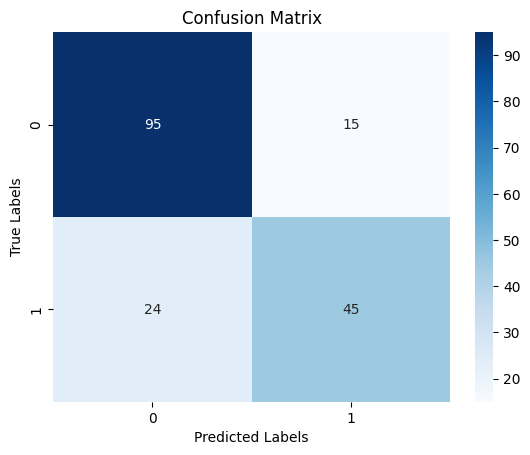

In [88]:
cm = confusion_matrix(y_test, y_pred_KNN)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

From the conclusion, both the models have almost the same accuracy score.


But, based on the Mean CV scores:

KFold SVM has the highest average accuracy

Stratified KFoold of KNN has the highest average accuracy